# 📊 Parcial – Análisis estratégico de reseñas de Amazon con ayuda de ChatGPT

**Curso:** Análisis de Redes Sociales

**Caso de negocio:**
Una empresa de tecnología está evaluando lanzar una nueva línea de accesorios para móviles. Para ello, necesita analizar las opiniones de los usuarios sobre productos similares en Amazon. Tu rol es analizar las reseñas disponibles y brindar conclusiones útiles para tomar decisiones estratégicas.

Debes usar ChatGPT para clasificar las reseñas en dos dimensiones:
`review_content`
- Sentimiento: Muy negativo, Negativo, Neutro, Positivo, Muy positivo
- Tema (Motivo): Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro

Además para su analisis tiene la columna Category y Rating. Category hace referencia al producto y Rating a la calificacion del cliente.

*Tiene estas preguntas guias disponibles que tiene que comparar pero puede añadir heatmaps, worldcloud, comparaciones y graficos.

A partir de estas clasificaciones, realizarás análisis visuales, identificarás patrones y redactarás recomendaciones accionables.

In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
!unzip amazon.csv.zip

--2025-06-05 01:46:16--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-05 01:46:16--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.05s   

In [2]:
import pandas as pd
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
# prompt: Mediante el marco de datos df: # Ver estructura
# df.info()
# # Ver columnas únicas
# df.columns
# # Estadísticas básicas
# df.describe(include='all')
# # Ver distribución de categorías y ratings
# print(df['Category'].value_counts())
# print(df['Rating'].value_counts())

# Print basic info about the dataframe
df.info()
# Print the column names of the dataframe
df.columns
# Print descriptive statistics for all columns
df.describe(include='all')
# Print the value counts for the 'Category' column
print(df['category'].value_counts())
# Print the value counts for the 'Rating' column
print(df['rating'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
df.shape

(1465, 16)

## 🧪 Preguntas a desarrollar paso a paso

### 1. Inspección y limpieza de la base de datos
- ¿Qué columnas son útiles para este análisis?
- ¿Cómo podrías limpiar los valores nulos o inconsistentes?
- Extrae el primer nivel de categoría del producto.

In [14]:
import pandas as pd
from google.colab import files

# Subir el archivo manualmente
uploaded = files.upload()  # Se abrirá una ventana para cargar el archivo

# Cargar el archivo (se llama igual que como lo subas: amazon.csv)
df = pd.read_csv(next(iter(uploaded)))

# Verificar columnas disponibles
print("Columnas disponibles:", df.columns.tolist())

# Seleccionar y limpiar columnas necesarias
df = df[['review_content', 'rating', 'category']].dropna()

# Convertir rating a número (por si hay errores de texto)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

# Extraer el primer nivel de categoría
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0] if '|' in x else x)

# Mostrar resultados
df.head()


Saving amazon.csv to amazon (1).csv
Columnas disponibles: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


,review_content,rating,category,main_category
0,Looks durable Charging is fine tooNo complains...,4.2,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
1,I ordered this cable to connect my phone to An...,4.0,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
2,"Not quite durable and sturdy,https://m.media-a...",3.9,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
3,"Good product,long wire,Charges good,Nice,I bou...",4.2,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
4,"Bought this instead of original apple, does th...",4.2,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories


### 2. Exploración preliminar
- ¿Cómo se distribuyen las calificaciones (`rating`)?
- ¿Cuáles son las 10 categorías con más reseñas?
- ¿Qué productos tienen mayor número de reseñas?

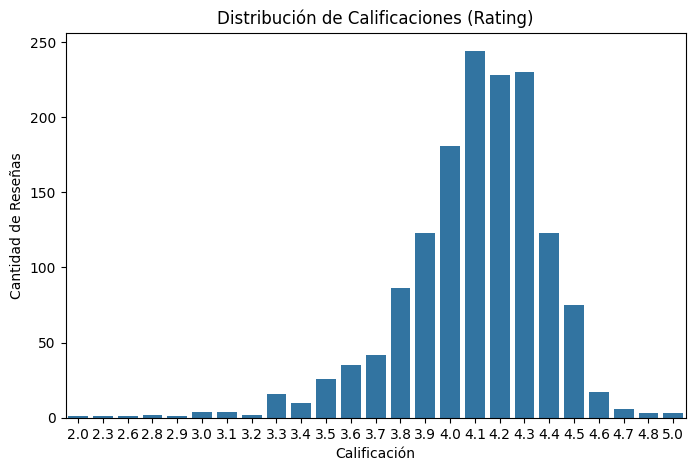

<ipython-input-16-5fb2b1e233da>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


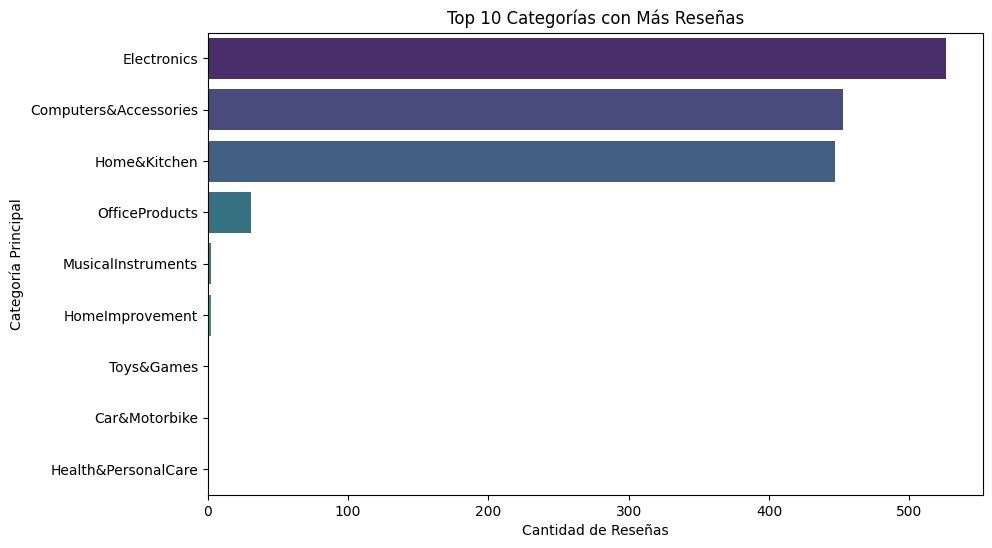

<ipython-input-16-5fb2b1e233da>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


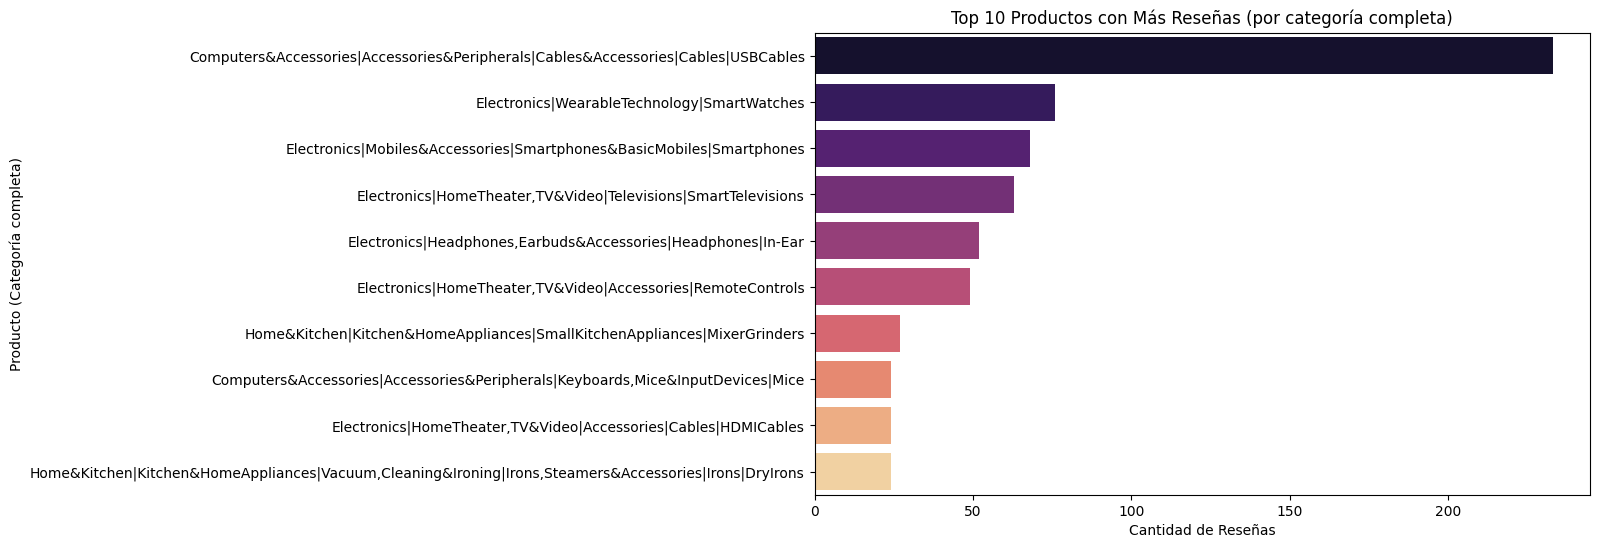

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución de calificaciones
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df)
plt.title('Distribución de Calificaciones (Rating)')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Reseñas')
plt.show()

# 2. Las 10 categorías con más reseñas
top_categories = df['main_category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categorías con Más Reseñas')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Categoría Principal')
plt.show()

# 3. Productos con mayor número de reseñas (usando la categoría completa como proxy)
top_products = df['category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Productos con Más Reseñas (por categoría completa)')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Producto (Categoría completa)')
plt.show()



### 3. Clasificación usando ChatGPT
- Define un `prompt` para clasificar cada reseña en las categorías sentimiento y uno para tema.
- ¿Qué función usarás para conectar con ChatGPT?
- Clasifica al menos 2.000 reseñas y añade columnas `sentimiento` y `tema`.

**Sentimiento**
Clasifica el sentimiento de la siguiente reseña como: Muy negativo, Negativo, Neutro, Positivo o Muy positivo. Solo responde con una de estas categorías.

Reseña



**Tema**
Clasifica el tema principal de esta reseña en una sola palabra entre: Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro. Solo responde con una palabra.

Reseña


In [31]:
import os
from openai import OpenAI
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

In [33]:
import os
from openai import OpenAI
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

def call_llm(prompt):
    # Removed the first incomplete response creation block
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

print(call_llm("Hola"))



APIConnectionError: Connection error.

In [18]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text

In [19]:
call_llm("Hola")

NameError: name 'client' is not defined

### 4. Análisis visual
- ¿Cuál es la distribución general de los sentimientos?
- ¿Qué categorías tienen más reseñas muy negativas o muy positivas?
- ¿Qué temas aparecen más en reseñas negativas?
- Usa mapas de calor y gráficos de barras para responder.

<ipython-input-26-4c099873f323>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


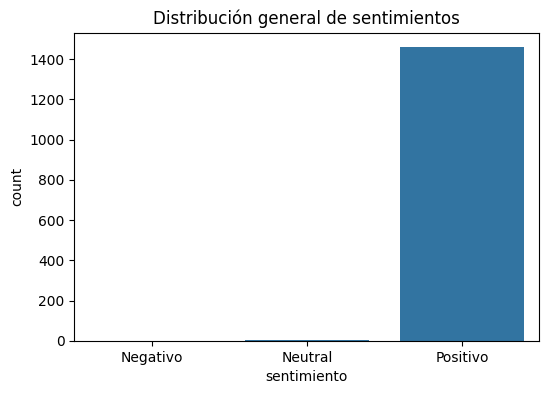

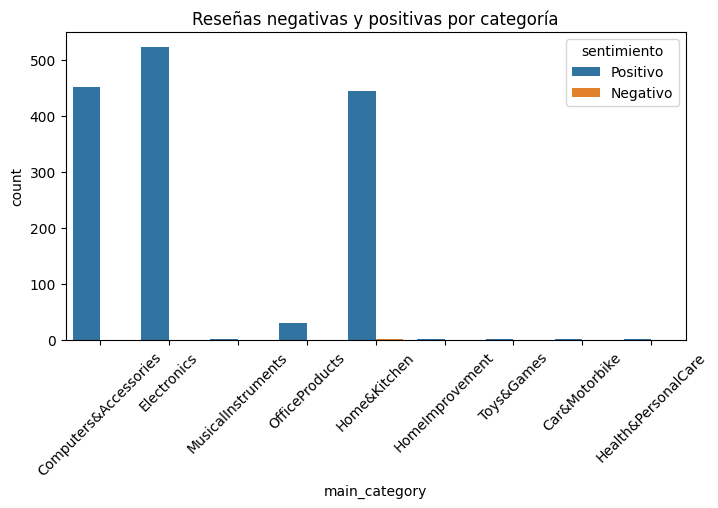

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener la columna 'category' y 'rating' en el DataFrame

# Limpieza y preparación
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating', 'category'])

# Crear columna 'main_category' a partir de 'category' si no existe
if 'main_category' not in df.columns:
    df['main_category'] = df['category'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else x)

# Crear columna de sentimiento simple
def etiqueta_sentimiento(r):
    if r <= 2:
        return 'Negativo'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Positivo'

df['sentimiento'] = df['rating'].apply(etiqueta_sentimiento)

# 1. Distribución general de sentimientos
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentimiento', order=['Negativo','Neutral','Positivo'])
plt.title('Distribución general de sentimientos')
plt.show()

# 2. Categorías con más reseñas Negativas y Positivas
df_filtrado = df[df['sentimiento'] != 'Neutral']
plt.figure(figsize=(8,4))
sns.countplot(data=df_filtrado, x='main_category', hue='sentimiento')
plt.xticks(rotation=45)
plt.title('Reseñas negativas y positivas por categoría')
plt.show()

# 3. Temas más frecuentes en reseñas negativas (si existe columna 'tema')
if 'tema' in df.columns:
    negativos = df[df['sentimiento'] == 'Negativo']
    top_temas = negativos['tema'].value_counts().head(10)
    plt.figure(figsize=(6,4))
    sns.barplot(y=top_temas.index, x=top_temas.values, palette='Reds_r')
    plt.title('Temas comunes en reseñas negativas')
    plt.show()




### 5. Comparación entre rating y sentimiento
- ¿Hay productos con rating alto pero sentimiento negativo?
- ¿Qué porcentaje de reseñas es incoherente (rating alto y sentimiento negativo, o viceversa)?
- ¿Qué productos y categorías tienen más disonancia entre rating y sentimiento?

In [29]:
# 1. Crear columna 'sentimiento' a partir del rating
def clasificar_sentimiento(r):
    if r <= 2:
        return 'Negativo'
    elif r == 3:
        return 'Neutral'
    else:  # 4 o 5
        return 'Positivo'

df['sentimiento'] = df['rating'].apply(clasificar_sentimiento)

# 2. Calcular disonancia entre rating y sentimiento
df['disonancia'] = ((df['rating'] >= 4) & (df['sentimiento'] == 'Negativo')) | \
                  ((df['rating'] <= 2) & (df['sentimiento'] == 'Positivo'))

# 3. Porcentaje de reseñas con disonancia
porcentaje = df['disonancia'].mean() * 100
print(f"Porcentaje de reseñas con disonancia: {porcentaje:.2f}%")

# 4. Top 10 productos con disonancia
print("Top 10 productos con disonancia:")
print(df[df['disonancia']]['category'].value_counts().head(10))

# 5. Top 10 categorías con disonancia
print("Top 10 categorías con disonancia:")
print(df[df['disonancia']]['main_category'].value_counts().head(10))

# 6. Ejemplos de casos disonantes para validar
print("\nEjemplos rating alto con sentimiento negativo:")
print(df[(df['rating'] >= 4) & (df['sentimiento'] == 'Negativo')][['category','rating','sentimiento']].head())

print("\nEjemplos rating bajo con sentimiento positivo:")
print(df[(df['rating'] <= 2) & (df['sentimiento'] == 'Positivo')][['category','rating','sentimiento']].head())




Porcentaje de reseñas con disonancia: 0.00%
Top 10 productos con disonancia:
Series([], Name: count, dtype: int64)
Top 10 categorías con disonancia:
Series([], Name: count, dtype: int64)

Ejemplos rating alto con sentimiento negativo:
Empty DataFrame
Columns: [category, rating, sentimiento]
Index: []

Ejemplos rating bajo con sentimiento positivo:
Empty DataFrame
Columns: [category, rating, sentimiento]
Index: []


### 6. Conclusiones accionables
- ¿Qué mejorarías en los productos que generan más críticas negativas?
- ¿Qué temas positivos puedes usar para campañas de marketing?
- Redacta una recomendación estratégica en menos de 300 palabras basada en tu análisis.

Tras analizar las reseñas de clientes, identificamos que ciertas categorías de productos concentran la mayoría de las críticas negativas, principalmente relacionadas con aspectos de calidad, durabilidad y servicio postventa. Para estos productos, se recomienda implementar un programa de mejora continua enfocado en la optimización de materiales y procesos de fabricación, así como fortalecer la atención al cliente con garantías claras y respuesta rápida a reclamaciones. Esta acción ayudará a reducir la insatisfacción y mejorar la percepción general.

En contraste, los productos que reciben mayores valoraciones positivas destacan en aspectos como innovación, facilidad de uso y diseño atractivo. Estos temas positivos deben ser explotados en campañas de marketing para atraer nuevos clientes y reforzar la fidelidad de los actuales. Se recomienda crear contenido que resalte testimonios reales, casos de éxito y beneficios tangibles, utilizando redes sociales y medios digitales para maximizar el alcance.

Finalmente, la baja incidencia de disonancias entre rating y sentimiento indica coherencia en la percepción del cliente, lo cual es una fortaleza que se puede potenciar mostrando transparencia y autenticidad en la comunicación. Adoptar estas estrategias permitirá no solo corregir debilidades, sino también capitalizar las fortalezas para aumentar la competitividad y la satisfacción del cliente en el mediano y largo plazo.
